In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data_Urbun(sheet):
    df_urban = {}
    years = ['98', '99', '1400', '1401']
    for year in years:
        file_name = f'U{year}.xlsx'
        sheet_name = f'U{year}{sheet}'
        df = pd.read_excel(file_name, sheet_name = sheet_name)
        df_urban[f'U{year}'] = df
    return df_urban

In [3]:
def load_data_Rural(sheet):
    df_Rural = {}
    years = ['98', '99', '1400', '1401']
    for year in years:
        file_name = f'R{year}.xlsx'
        sheet_name = f'R{year}{sheet}'
        df = pd.read_excel(file_name, sheet_name = sheet_name)
        df_Rural[f'R{year}'] = df
    return df_Rural

In [4]:
Rural_Data = load_data_Rural('Data')
Urbun_Data = load_data_Urbun('Data')

In [5]:
Transportation_Urban = load_data_Urbun('P3S07')
Transportation_Rural = load_data_Rural('P3S07')

In [6]:
living_Data_Urban = load_data_Urbun('P2')
living_Data_Rural = load_data_Rural('P2')

In [7]:
Social_characteristics_Urban = load_data_Urbun('P1')
Social_characteristics_Rural = load_data_Rural('P1')

In [8]:
paid_jobs_Urban = load_data_Urbun('P4S01')
paid_jobs_Rural = load_data_Rural('P4S01')

In [9]:
freelance_jobs_Rural = load_data_Rural('P4S02')
freelance_jobs_Urban = load_data_Urbun('P4S02')

In [10]:
paid_jobs_Urban['U1401']['days_w'] = paid_jobs_Urban['U1401']['days_w'].str.strip()
paid_jobs_Urban['U1401'].loc[paid_jobs_Urban['U1401']['days_w'] == '', 'days_w'] = np.nan
paid_jobs_Urban['U1401']['days_w'] = paid_jobs_Urban['U1401']['days_w'].astype(float)

paid_jobs_Rural['R1401']['days_w'] = paid_jobs_Rural['R1401']['days_w'].str.strip()
paid_jobs_Rural['R1401'].loc[paid_jobs_Rural['R1401']['days_w'] == '', 'days_w'] = np.nan
paid_jobs_Rural['R1401']['days_w'] = paid_jobs_Rural['R1401']['days_w'].astype(float)

In [11]:
freelance_jobs_Urban['U1401']['days_s'] = freelance_jobs_Urban['U1401']['days_s'].str.strip()
freelance_jobs_Urban['U1401'].loc[freelance_jobs_Urban['U1401']['days_s'] == '', 'days_s'] = np.nan
freelance_jobs_Urban['U1401']['days_s'] = freelance_jobs_Urban['U1401']['days_s'].astype(float)

freelance_jobs_Rural['R1401']['days_s'] = freelance_jobs_Rural['R1401']['days_s'].str.strip()
freelance_jobs_Rural['R1401'].loc[freelance_jobs_Rural['R1401']['days_s'] == '', 'days_s'] = np.nan
freelance_jobs_Rural['R1401']['days_s'] = freelance_jobs_Rural['R1401']['days_s'].astype(float)

In [12]:
for key, value in paid_jobs_Urban.items() :
    df_temp = value.groupby(['Address', 'Fasl']).size().reset_index(name='members_Count_Paid')
    paid_jobs_Urban[key] = value.groupby(['Address', 'Fasl'])[['days_w', 'netincome_w_m']].sum().reset_index()
    paid_jobs_Urban[key] = paid_jobs_Urban[key].merge(df_temp, on = ['Address', 'Fasl'], how = 'left')
    
    
for key, value in paid_jobs_Rural.items() :
    df_temp = value.groupby(['Address', 'Fasl']).size().reset_index(name='members_Count_Paid')
    paid_jobs_Rural[key] = value.groupby(['Address', 'Fasl'])[['days_w', 'netincome_w_m']].sum().reset_index()
    paid_jobs_Rural[key] = paid_jobs_Rural[key].merge(df_temp, on = ['Address', 'Fasl'], how = 'left')

In [13]:
for key, value in freelance_jobs_Urban.items() :
    df_temp = value.groupby(['Address', 'Fasl']).size().reset_index(name='members_Count_Freelance')
    freelance_jobs_Urban[key] = value.groupby(['Address', 'Fasl'])[['days_s', ]].sum().reset_index()
    freelance_jobs_Urban[key] = freelance_jobs_Urban[key].merge(df_temp, on = ['Address', 'Fasl'], how = 'left')
    
for key, value in freelance_jobs_Rural.items() :
    df_temp = value.groupby(['Address', 'Fasl']).size().reset_index(name='members_Count_Freelance')
    freelance_jobs_Rural[key] = value.groupby(['Address', 'Fasl'])[['days_s']].sum().reset_index()
    freelance_jobs_Rural[key] = freelance_jobs_Rural[key].merge(df_temp, on = ['Address', 'Fasl'], how = 'left')

In [14]:
years = ['98', '99', '1400', '1401']
days_R = {}
days_U = {}
for year in years :
    df_temp = freelance_jobs_Urban[f'U{year}'].merge(paid_jobs_Urban[f'U{year}'], on = ['Address', 'Fasl'], how = 'outer').fillna(0)
    df_temp['days'] = df_temp['days_s'] + df_temp['days_w']
    df_temp.drop(columns = ['days_s', 'days_w'], inplace = True)
    df_temp['working_Member'] = df_temp['members_Count_Freelance'] + df_temp['members_Count_Paid']
    df_temp.drop(columns=['members_Count_Freelance', 'members_Count_Paid'], inplace = True)
    days_U[f'U{year}'] = df_temp
    
for year in years :
    df_temp = freelance_jobs_Rural[f'R{year}'].merge(paid_jobs_Rural[f'R{year}'], on = ['Address', 'Fasl'], how = 'outer').fillna(0)
    df_temp['days'] = df_temp['days_s'] + df_temp['days_w']
    df_temp.drop(columns = ['days_s', 'days_w'], inplace = True)
    df_temp['working_Member'] = df_temp['members_Count_Freelance'] + df_temp['members_Count_Paid']
    df_temp.drop(columns=['members_Count_Freelance', 'members_Count_Paid'], inplace = True)
    days_R[f'R{year}'] = df_temp

In [15]:
for key, value in living_Data_Urban.items() :
    living_Data_Urban[key] = value[['Address', 'vehicle', 'motorcycle', 'bicycle']]
    
for key, value in living_Data_Rural.items() :
    living_Data_Rural[key] = value[['Address', 'vehicle', 'motorcycle', 'bicycle']]

In [16]:
for key, value in Urbun_Data.items() :
    Urbun_Data[key] = value[['Address', 'Fasl', 'province', 'town']]
    
for key, value in Rural_Data.items() :
    Rural_Data[key] = value[['Address', 'Fasl', 'province', 'town']]

In [17]:
members_Urban = {}
members_Rural = {}
for key, value in Social_characteristics_Urban.items():
    members_Urban[key] = value.groupby('Address').size().reset_index(name='members_count')

for key, value in Social_characteristics_Rural.items():
    members_Rural[key] = value.groupby('Address').size().reset_index(name='members_count')

In [18]:
for key, value in Transportation_Urban.items() :
    Transportation_Urban[key]['code'] = Transportation_Urban[key]['code'] // 10
    Transportation_Urban[key] = value.groupby(['Address', 'code'])[['value']].sum().reset_index()
    
for key, value in Transportation_Rural.items() :
    Transportation_Rural[key]['code'] = Transportation_Rural[key]['code'] // 10
    Transportation_Rural[key] = value.groupby(['Address', 'code'])[['value']].sum().reset_index()

In [19]:
years = ['98', '99', '1400', '1401']
df_temp_R = {}
df_temp_U = {}

for year in years :
    df_R = Transportation_Rural[f'R{year}'].merge(members_Rural[f'R{year}'], how='left', on='Address')
    df_R = df_R.merge(Rural_Data[f'R{year}'],  how='left', on='Address')
    df_R = df_R.merge(living_Data_Rural[f'R{year}'], how = 'left', on = 'Address')
    df_R = df_R.merge(days_R[f'R{year}'], how = 'left', on = ['Address', 'Fasl'])
    df_R['year'] = year
    df_R['year'] = df_R['year'].astype(int)
    df_temp_R[year] = df_R
    
for year in years :
    df_U = Transportation_Urban[f'U{year}'].merge(members_Urban[f'U{year}'], how='left', on='Address')
    df_U = df_U.merge(Urbun_Data[f'U{year}'],  how='left', on='Address')
    df_U = df_U.merge(living_Data_Urban[f'U{year}'], how = 'left', on = 'Address')
    df_U = df_U.merge(days_U[f'U{year}'], how = 'left', on = ['Address', 'Fasl'])
    df_U['year'] = year
    df_U['year'] = df_U['year'].astype(int)
    df_temp_U[year] = df_U

In [20]:
df_final_R = pd.concat((df_temp_R['98'], df_temp_R['99']))
df_final_R = pd.concat((df_final_R, df_temp_R['1400']))
df_final_R = pd.concat((df_final_R, df_temp_R['1401']))
df_final_R['Region'] = 0

df_final_U = pd.concat((df_temp_U['98'], df_temp_U['99']))
df_final_U = pd.concat((df_final_U, df_temp_U['1400']))
df_final_U = pd.concat((df_final_U, df_temp_U['1401']))
df_final_U['Region'] = 1

In [21]:
df_final = pd.concat((df_final_R, df_final_U))
df_final

,Address,code,value,members_count,Fasl,province,town,vehicle,motorcycle,bicycle,netincome_w_m,days,working_Member,year,Region
0,20001383908,7221,350000,4,2,Markazi,1,False,True,False,0.0,7.0,1.0,98,0
1,20001383908,7321,400000,4,2,Markazi,1,False,True,False,0.0,7.0,1.0,98,0
2,20001383911,7321,70000,2,2,Markazi,1,False,False,False,NaN,NaN,NaN,98,0
3,20001383911,7322,300000,2,2,Markazi,1,False,False,False,NaN,NaN,NaN,98,0
4,20001383915,7221,1000000,2,2,Markazi,1,True,False,False,0.0,5.0,1.0,98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29880,13006383835,7321,3500000,2,2,Alborz,6,False,False,False,60000000.0,7.0,1.0,1401,1
29881,13006383838,7221,2600000,3,2,Alborz,6,True,False,False,123933333.0,12.0,2.0,1401,1
29882,13006383838,7321,3000000,3,2,Alborz,6,True,False,False,123933333.0,12.0,2.0,1401,1
29883,13006383841,7221,2300000,3,2,Alborz,6,True,False,False,0.0,6.0,1.0,1401,1


In [22]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_final['province'] = LE.fit_transform(df_final['province'])

<Axes: >

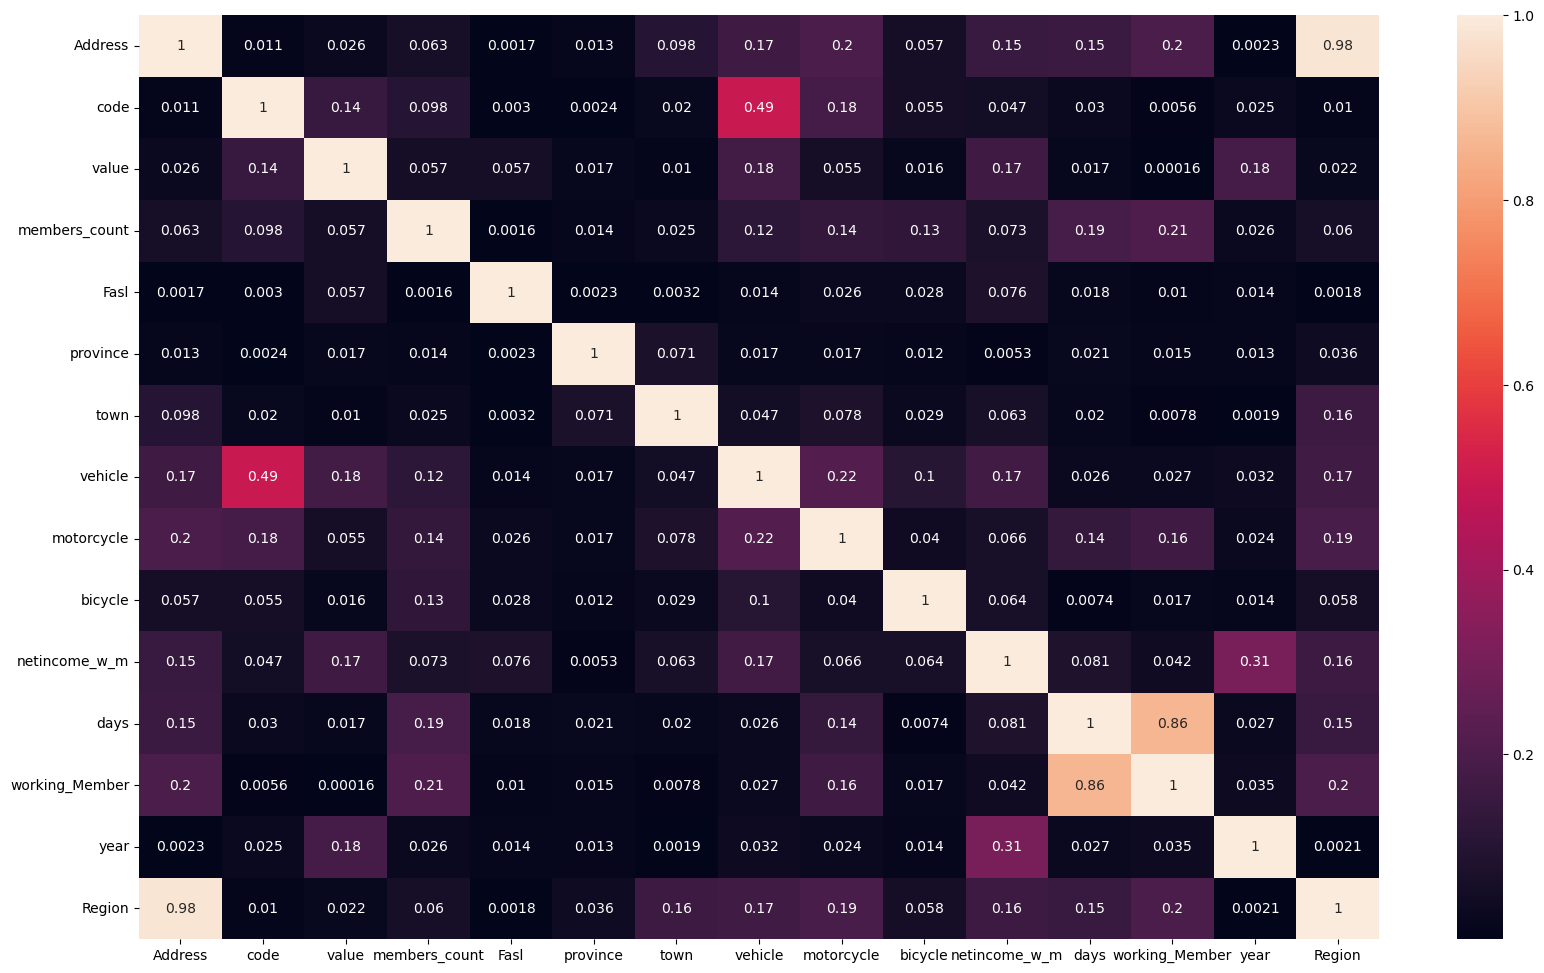

In [23]:
df_final.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(df_final.corr().abs(), annot= True)

In [38]:
Test = df_final.loc[(df_final['Fasl'] == 4) & (df_final['year'] == 1401)]
Train = df_final.loc[~((df_final['Fasl'] == 4) & (df_final['year'] == 1401))]

In [39]:
days_median = Train['days'].median()
working_median = Train['working_Member'].median()
net_income_median = Train['netincome_w_m'].median()

Train.loc[:, 'days'] = Train['days'].fillna(days_median)
Train.loc[:, 'working_Member'] = Train['working_Member'].fillna(working_median)
Train.loc[:, 'netincome_w_m'] = Train['netincome_w_m'].fillna(net_income_median)

Test.loc[:, 'days'] = Test['days'].fillna(days_median)
Test.loc[:, 'working_Member'] = Test['working_Member'].fillna(working_median)
Test.loc[:, 'netincome_w_m'] = Test['netincome_w_m'].fillna(net_income_median)

#### delete outliers and feature selection

In [40]:
list_IQR = ['value', 'netincome_w_m']

In [41]:
for col in list_IQR:
    
    Q1 = Train[col].quantile(0.25)
    Q3 = Train[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    Train = Train[(Train[col] >= lower_bound) & (Train[col] <= upper_bound)]

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


y = Train[['value']]
X = Train.drop(columns = ['value'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=12, max_depth=12, random_state=42)

clf.fit(X_train, y_train['value'])

RandomForestClassifier(max_depth=12, n_estimators=12, random_state=42)

In [44]:
importances = clf.feature_importances_

feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

feature_importances = feature_importances.sort_values(by='importance', ascending=False)
feature_importances

,feature,importance
0,Address,0.142471
1,code,0.141047
4,province,0.099971
9,netincome_w_m,0.096240
5,town,0.086116
10,days,0.075893
12,year,0.073864
6,vehicle,0.068260
2,members_count,0.066265
3,Fasl,0.054748


In [45]:
X_train.drop(columns= ['Region', 'bicycle'], inplace=True)
X_test.drop(columns= ['Region', 'bicycle'], inplace=True)

In [46]:
SS_X = StandardScaler()
SS_y = StandardScaler()
X_train = SS_X.fit_transform(X_train)
y_train = SS_y.fit_transform(y_train)

X_test = SS_X.transform(X_test)
y_test = SS_y.transform(y_test)

#### XGB

In [47]:
from skopt import BayesSearchCV
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

param_space = {
    'n_estimators': (50, 200, 500),
    'learning_rate': (0.01, 0.2, 'log-uniform'),
    'max_depth': (3, 10),
    'subsample': (0.6, 1.0),
    'gamma': [0.3],
    'colsample_bytree': (0.6, 1.0),
    'min_child_weight': [7]
}


bayes_search_xgb = BayesSearchCV(xgb_model, param_space, n_iter=50, cv=5, random_state=42, n_jobs=-1, scoring='r2')

bayes_search_xgb.fit(X_train, y_train)

In [37]:
bayes_search_xgb.best_score_

0.4420043437579886

In [97]:
y_pred = bayes_search_xgb.predict(X_test)
r2_score(y_pred=y_pred, y_true=y_test)

0.3951748393121368

#### CatBoost

In [36]:
from catboost import CatBoostRegressor
from skopt.space import Real, Integer

catboost_model = CatBoostRegressor(verbose=0)

param_space = {
    'iterations': Integer(50, 200),
    'learning_rate': Real(0.01, 0.2, prior='log-uniform'), 
    'depth': Integer(3, 10), 
    'l2_leaf_reg': Real(1, 10, prior='log-uniform'),
    'bagging_temperature': Real(0.0, 1.0)
}

bayes_search_cat = BayesSearchCV(catboost_model,param_space, n_iter=50, cv=5, random_state=42, n_jobs=-1)

bayes_search_cat.fit(X_train, y_train)

BayesSearchCV(cv=5,
              estimator=<catboost.core.CatBoostRegressor object at 0x000001CF262645B0>,
              n_jobs=-1, random_state=42,
              search_spaces={'bagging_temperature': Real(low=0.0, high=1.0, prior='uniform', transform='normalize'),
                             'depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'iterations': Integer(low=50, high=200, prior='uniform', transform='normalize'),
                             'l2_leaf_reg': Real(low=1, high=10, prior='log-uniform', transform='normalize'),
                             'learning_rate': Real(low=0.01, high=0.2, prior='log-uniform', transform='normalize')})

In [37]:
bayes_search_cat.best_score_

0.383461685406074

In [38]:
y_pred = bayes_search_cat.predict(X_test)
r2_score(y_pred=y_pred, y_true=y_test)

0.38301145478992915

#### Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor
from skopt import BayesSearchCV

from skopt.space import Categorical, Integer

param_space = {
    'n_estimators': Categorical([200, 500]),
    'max_features': Categorical(['sqrt', 'log2']),
    'max_depth': Categorical([5, 10, 15]),
    'min_samples_split': Categorical([4, 6]),
    'min_samples_leaf': Categorical([1, 2, 5])
}
rf_reg = RandomForestRegressor()

bayes_search_rf = BayesSearchCV(rf_reg, param_space, n_iter=35, cv=5,random_state=42,n_jobs=-1)

bayes_search_rf.fit(X_train, y_train)

d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 'sqrt', 1, 6, 200] before, using random point [10, 'log2', 1, 6, 200]
  warnings.warn(
d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 'log2', 1, 6, 500] before, using random point [15, 'log2', 1, 6, 200]
  warnings.warn(
d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'log2', 5, 4, 500] before, using random point [15, 'sqrt', 5, 6, 500]
  warnings.warn(
d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 'log2', 2, 4, 500] before, using random point [15, 'sqrt', 1, 6, 500]
  warnings.warn(
d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning:

BayesSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=40, n_jobs=-1,
              random_state=42,
              search_spaces={'max_depth': Categorical(categories=(5, 10, 15), prior=None),
                             'max_features': Categorical(categories=('sqrt', 'log2'), prior=None),
                             'min_samples_leaf': Categorical(categories=(1, 2, 5), prior=None),
                             'min_samples_split': Categorical(categories=(4, 6), prior=None),
                             'n_estimators': Categorical(categories=(200, 500), prior=None)})

In [42]:
bayes_search_rf.best_score_

0.3642145903604424

In [41]:
y_pred = bayes_search_rf.predict(X_test)
r2_score(y_pred=y_pred, y_true=y_test)

0.36285072511205785

In [44]:
from sklearn.ensemble import StackingRegressor
models = [
    ('xgboost', bayes_search_xgb.best_estimator_),
    ('catboost', bayes_search_cat.best_estimator_)
]

sr = StackingRegressor(estimators=models, final_estimator=bayes_search_rf.best_estimator_)
sr.fit(X_train, y_train)

d:\miniconda3\envs\bootcamp\lib\site-packages\sklearn\ensemble\_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingRegressor(estimators=[('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.6, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0.3,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_...
                                            max_leaves=None, min_child_weight=7,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('catboost',
                               <catboost.core.CatBoostRegressor object at 0x000001CF2874D130>)],
                  final_estimator=RandomForestRegressor(max_depth=15,
                                                        max_features='log2',
                                                        min_samples_leaf=2,
                                                        min_samples_split=4,
                                                        n_estimators=500))

In [45]:
y_pred = sr.predict(X_test)
r2_score(y_test, y_pred)

0.3906129112030253

#### SVC

In [53]:
# from sklearn.svm import SVR
# from sklearn.model_selection import RandomizedSearchCV

In [51]:
# params = {
#     'C': [1, 10, 100, 1000],
#     'gamma': [0.0001, 0.001, 0.01, 0.1, 'auto', 'scale'],
#  'kernel': ['linear' , 'poly', 'rbf'],
#     'degree': [2, 3, 4, 5]
# }

In [54]:
# svr_model = SVR()
# random_search_SVR = RandomizedSearchCV(svr_model, params, cv=5, n_jobs=-1, n_iter=100, random_state=42, scoring='r2')
# random_search_SVR.fit(X_train, y_train)

In [ ]:
# random_search_SVR.best_score_